# CSI 5139F: Assignment 1

Student: Ao Zhang

Student Number: 0300039680

Student Email: azhan085@uottawa.ca

## 1. Getting Started

As indicated in the assignment description, the dataset *Phos_2_0_2MP* is downloaded.

Then, *os* is used for better organizing the folders' paths; *glob* is used to read the image filenames faster. one of the images is plotted for users to checkout how they look like.

Since we start from *uestion 2*, all the required images (non-uniform illumination and uniform illumination) are seperated into two classes. The labels to the corresponding pictures are defined as:

- **non-uniform illumination**: **2**
- **uniform illumination**: **0**

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
import os
import glob
import numpy as np

nonuni_pics = []
uni_pics = []

# read all scene folders
total_folers = glob.glob("../Phos2_0_2MP/Phos2_scene*")

# check out how many folders are there
print("Total number of scenes is: \t \t", len(total_folers))

# read the image filenames according to the category (nonuniform and uniform)
for each_foler in total_folers:
    nonuni_path = os.path.join(each_foler, "*_nonuni_*.png")
    uni_path = os.path.join(each_foler, "*_uni_*.png")
    nonuni_pics += glob.glob(nonuni_path)
    uni_pics += glob.glob(uni_path)

# check out dataset size
print("Number of non-uniform Pictures: \t", len(nonuni_pics))
print("Number of uniform Pictures: \t \t", len(uni_pics))

'''
set classifier as:
1   ->   non-uniform
0   ->   uniform
'''
nonuni_label = 1
uni_label = 0

# define the labels to the corresponding pictures
def DefineLabels(img_names, label, gray = True):
    imgs = []
    labels = []
    for each_img_name in img_names:
        # read images as grayscale
        imgs.append(imread(each_img_name, as_gray = gray))
        labels.append(label)
    imgs = np.array(imgs)
    labels = np.array(labels)
    return imgs, labels

nonuni_imgs, nonuni_labels = DefineLabels(nonuni_pics, nonuni_label)
uni_imgs, uni_labels = DefineLabels(uni_pics, uni_label)

# plot one of the images to check what the image looks like
plt.imshow(nonuni_imgs[0])
plt.show()

Total number of scenes is: 	 	 15
Number of non-uniform Pictures: 	 90
Number of uniform Pictures: 	 	 135


<Figure size 640x480 with 1 Axes>

## 2. Binary Classifier

### The way of splitting the images

**For each class**, before sent into the function *train_test_split()*, the images are first shuffled with labels. 

Then, shuffled images and labels are sent to *train_test_split()*. **60%** of the data are selected as **training set**. Then the rest $40\%$ are sent into *train_test_split()* again and split into **validation set** and **test set** equally.

Therefore,
- **60%** of data are selected randomly as **training data**;.
- **20%** of data are selected randomly as **validation data**;
- **20%** of data are selected randomly as **testing data**;

After training sets, validation sets, testing sets are selected seperately from each class, all training sets are **concatenated** to make the **final training set**. Same operation is applied to make **final validation set** and **final testing set**.

*By doing this, we can make sure the proportions of different classes in the datasets keep the same*

In [2]:
from sklearn.model_selection import train_test_split

'''
principle:
    60% selected as training dataset;
    20% selected as validation dataset;
    20% selected as test dataset.
'''
# shuffle images and labels at the same time
def ShuffleData(imgs, labels):
    index = np.arange(len(imgs))
    np.random.shuffle(index)
    return imgs[index], labels[index]

# first shuffle
nonuni_imgs, nonuni_labels = ShuffleData(nonuni_imgs, nonuni_labels)
uni_imgs, uni_labels = ShuffleData(uni_imgs, uni_labels)

# split the data into train, validation, test
def SplitData(imgs, labels, train_size, validation_size):
    X_train, X_rest, Y_train, Y_rest = train_test_split(imgs, labels, \
                                                        test_size = (1 - train_size), random_state=42)
    X_validation, X_test, Y_validation, Y_test = train_test_split(X_rest, Y_rest, \
                                                          test_size = (1 - validation_size), random_state=42)
    return X_train, X_validation, X_test, Y_train, Y_validation, Y_test

# split nonuniform images and labels into 3 sets
nonuni_Xtrain, nonuni_Xvalidation, nonuni_Xtest, nonuni_Ytrain, nonuni_Yvalidation, nonuni_Ytest = \
                                            SplitData(nonuni_imgs, nonuni_labels, 0.6, 0.5)

uni_Xtrain, uni_Xvalidation, uni_Xtest, uni_Ytrain, uni_Yvalidation, uni_Ytest = \
                                            SplitData(uni_imgs, uni_labels, 0.6, 0.5)

# combine all images and labels into one set and shuffle it
def CombineDataAndShuffle(pre_combined_imgs, pre_combined_labels):
    # combine data
    combined_imgs = np.concatenate(pre_combined_imgs, axis = 0)
    combined_labels = np.concatenate(pre_combined_labels, axis = 0)
    # shuffle
    shuffled_imgs, shuffled_labels = ShuffleData(combined_imgs, combined_labels)
    return shuffled_imgs, shuffled_labels

# get pre-combined imgs and labels
X_train_pre, Y_train_pre = [nonuni_Xtrain, uni_Xtrain], [nonuni_Ytrain, uni_Ytrain]
X_validation_pre, Y_validation_pre = [nonuni_Xvalidation, uni_Xvalidation], [nonuni_Yvalidation, uni_Yvalidation]
X_test, Y_test = [nonuni_Xtest, uni_Xtest], [nonuni_Ytest, uni_Ytest]

# second shuffle
X_train, Y_train = CombineDataAndShuffle(X_train_pre, Y_train_pre)
X_validation, Y_validation = CombineDataAndShuffle(X_validation_pre, Y_validation_pre)
X_test, Y_test = CombineDataAndShuffle(X_test, Y_test)

print("Number of data used for training: \t", len(Y_train))
print("Number of data used for validation: \t", len(Y_validation))
print("Number of data used for test: \t \t", len(Y_test))


Number of data used for training: 	 135
Number of data used for validation: 	 45
Number of data used for test: 	 	 45


### All metrics

all the metrics, including the confusion matrix, the accuracy, the recall and the precision are derived by the *sklearn* functions and printed as follow.

Validation score: 	 0.9111111111111111
Confusion Matrix: 
 [[27  0]
 [ 3 15]]
Accuracy: 		 0.9333333333333333
Recall: 		 1.0
Precision: 		 0.8333333333333334


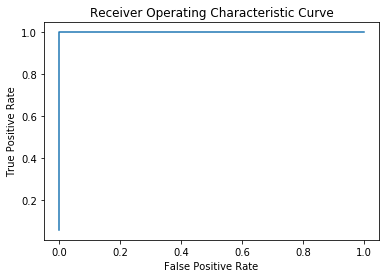

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve

def change_format(data):
    shape = data.shape
    return data.reshape((shape[0], -1))

X_train = change_format(X_train)
X_validation = change_format(X_validation)
X_test = change_format(X_test)

# all parameters not specified are set to their defaults
logistic_regression = LogisticRegression(solver = 'liblinear')

# fit data into model
logistic_regression.fit(X_train, Y_train)

# find out score
score = logistic_regression.score(X_validation, Y_validation)
print("Validation score: \t", score)

# predict labels
Pred_test = logistic_regression.predict(X_test)
Y_score = logistic_regression.decision_function(X_test)

# confusion matrix
confusionmatrix = confusion_matrix(Y_test, Pred_test)

# accuracy
accuracy = accuracy_score(Pred_test, Y_test)

# recall
recall = recall_score(Pred_test, Y_test)

# precision
precision = precision_score(Pred_test, Y_test)

# ROC
fpr, tpr, _ = roc_curve(Y_test, Y_score)

print("Confusion Matrix: \n", confusionmatrix)
print("Accuracy: \t\t", accuracy)
print("Recall: \t\t", recall)
print("Precision: \t\t", precision)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()


## 3. Multiclass Classifier

All images are derived into $3$ groups as the problem requires. Also, as usual, one of the images is plotted for visualizing the dataset.

Total images: 	 	 	 225
Underexposed images: 	 	 60
Overexposed images: 	 	 60
Regular images: 	 	 105


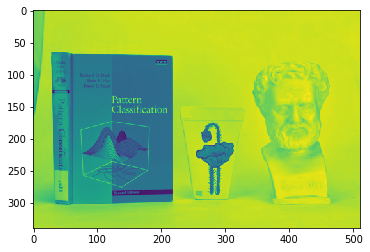

In [4]:
all_img = []
under_exp_img = []
over_exp_img = []

# read the image filenames according to the classes
for each_foler in total_folers:
    all_path = os.path.join(each_foler, "*.png")
    under_path = os.path.join(each_foler, "*_minus_*.png")
    over_path = os.path.join(each_foler, "*_plus_*.png")
    all_img += glob.glob(all_path)
    under_exp_img += glob.glob(under_path)
    over_exp_img += glob.glob(over_path)

# check the total number of images for further checkout
print("Total images: \t \t \t", len(all_img))

# initial regular images
regular_img = all_img

# remove all images shown in under exposed images
for img_i in under_exp_img:
    regular_img.remove(img_i)

# remove all images shown in over exposed images
for img_j in over_exp_img:
    regular_img.remove(img_j)
    
# check out dataset size
print("Underexposed images: \t \t", len(under_exp_img))
print("Overexposed images: \t \t", len(over_exp_img))
print("Regular images: \t \t", len(regular_img))

# set labels
'''
set classifier as:
0   ->   underexposed
1   ->   overexposed
2   ->   regular
'''
under_label = 0
over_label = 1
regular_label = 2

# define the labels to the corresponding pictures
underexp_imgs, underexp_labels = DefineLabels(under_exp_img, under_label)
overexp_imgs, ovexp_labels = DefineLabels(over_exp_img, over_label)
regular_imgs, regular_labels = DefineLabels(regular_img, regular_label)

# plot one of the images to check what the image looks like
plt.imshow(underexp_imgs[0])
plt.show()


### Data Splitting

**Same trick as the last question**, which is images are splitted into training set, validation set and test set with proportion $60\%$, $20\%$ and $20\%$ respectively **in each class**. Then, all training sets, validation sets and test sets are combined together into $3$ sets.

### Metrics

The **confusion matrix** and the **accuracy** are printed at the end of the cell.

In [ ]:
 # first shuffle
underexp_imgs, underexp_labels = ShuffleData(underexp_imgs, underexp_labels)
overexp_imgs, ovexp_labels = ShuffleData(overexp_imgs, ovexp_labels)
regular_imgs, regular_labels = ShuffleData(regular_imgs, regular_labels)

# split images and labels into 3 sets
under_Xtrain, under_Xvalidation, under_Xtest, under_Ytrain, under_Yvalidation, under_Ytest = \
                                            SplitData(underexp_imgs, underexp_labels, 0.6, 0.5)

over_Xtrain, over_Xvalidation, over_Xtest, over_Ytrain, over_Yvalidation, over_Ytest = \
                                            SplitData(overexp_imgs, ovexp_labels, 0.6, 0.5)

regular_Xtrain, regular_Xvalidation, regular_Xtest, regular_Ytrain, regular_Yvalidation, regular_Ytest = \
                                            SplitData(regular_imgs, regular_labels, 0.6, 0.5)

# get pre-combined imgs and labels
X_train_pre, Y_train_pre = [under_Xtrain, over_Xtrain, regular_Xtrain], [under_Ytrain, over_Ytrain, regular_Ytrain]
X_validation_pre, Y_validation_pre = [under_Xvalidation, over_Xvalidation, regular_Xvalidation], \
                                    [under_Yvalidation, over_Yvalidation, regular_Yvalidation]
X_test, Y_test = [under_Xtest, over_Xtest, regular_Xtest], [under_Ytest, over_Ytest, regular_Ytest]

# second shuffle
X_train, Y_train = CombineDataAndShuffle(X_train_pre, Y_train_pre)
X_validation, Y_validation = CombineDataAndShuffle(X_validation_pre, Y_validation_pre)
X_test, Y_test = CombineDataAndShuffle(X_test, Y_test)

# change image from (N, w, h) to (N, -1)
X_train = change_format(X_train)
X_validation = change_format(X_validation)
X_test = change_format(X_test)

"""
Same package used for "Binary Classifier"
"""
# all parameters not specified are set to their defaults
logistic_regression = LogisticRegression(solver='liblinear', multi_class='ovr')

# fit data into model
logistic_regression.fit(X_train, Y_train)

# find out score
score = logistic_regression.score(X_validation, Y_validation)

print("Validation score: \t", score)

# predict labels
Pred_test = logistic_regression.predict(X_test)

# confusion matrix
confusionmatrix = confusion_matrix(Y_test, Pred_test)

# accuracy
accuracy = accuracy_score(Pred_test, Y_test)

print("Confusion Matrix: \n", confusionmatrix)
print("Accuracy: \t\t", accuracy)



Validation score: 	 0.8888888888888888
Confusion Matrix: 
 [[11  0  1]
 [ 0 10  2]
 [ 2  1 18]]
Accuracy: 		 0.8666666666666667


## Improved Classification of Colour Images

### Re-read images as RGB and Build the classifier


In [ ]:
"""
Try color images first
"""
# to avoid RAM error, select partial data for training
##################### 16 GB still not enough!!!! ##################
training_ratio = 0.5

# define the labels to the corresponding pictures
underexp_imgs, underexp_labels = DefineLabels(under_exp_img, under_label, False)
overexp_imgs, overexp_labels = DefineLabels(over_exp_img, over_label, False)
regular_imgs, regular_labels = DefineLabels(regular_img, regular_label, False)

# shuffle
underexp_imgs, underexp_labels = ShuffleData(underexp_imgs, underexp_labels)
overexp_imgs, overexp_labels = ShuffleData(overexp_imgs, overexp_labels)
regular_imgs, regular_labels = ShuffleData(regular_imgs, regular_labels)

# select images
num_under = int(training_ratio * len(underexp_imgs))
num_over = int(training_ratio * len(overexp_imgs))
num_reg = int(training_ratio * len(regular_imgs))

underexp_imgs, underexp_labels = underexp_imgs[:num_under], underexp_labels[:num_under]
overexp_imgs, overexp_labels = overexp_imgs[:num_over], overexp_labels[:num_over]
regular_imgs, regular_labels = regular_imgs[:num_reg], regular_labels[:num_reg]

# get pre-combined imgs and labels
X_train_pre, Y_train_pre = [underexp_imgs, overexp_imgs, regular_imgs], \
                            [underexp_labels, overexp_labels, regular_labels]

# second shuffle
X_train, Y_train = CombineDataAndShuffle(X_train_pre, Y_train_pre)

# change image from (N, w, h) to (N, -1)
X_train = change_format(X_train)

# all parameters not specified are set to their defaults
logistic_regression_color = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# fit data into model
logistic_regression_color.fit(X_train, Y_train)

print("done")


done


In [ ]:
from skimage.transform import resize
from tqdm import tqdm

# pipeline the images, seperate the image into 4 then upsampling to increase the number of training images
def ImageAugment(imgs, output_x_num, output_y_num):
    hm_imgs, w, h, ch = imgs.shape
    x_cut_size = w // output_x_num
    y_cut_size = h // output_y_num
    all_imgs = imgs
    for im_id in tqdm(range(hm_imgs)):
        current_img = imgs[im_id]
        for i in range(output_x_num):
            for j in range(output_y_num):
                new_img = current_img[i*x_cut_size: (i+1)*x_cut_size, j*y_cut_size: (j+1)*y_cut_size, :]
                new_img = resize(new_img, (w, h))
                new_img = np.expand_dims(new_img, axis = 0)
                all_imgs = np.concatenate([all_imgs, new_img], axis = 0)
    return all_imgs

# produce images
underexp_produced_imgs = ImageAugment(underexp_imgs, 2, 2)
overexp_produced_imgs = ImageAugment(overexp_imgs, 2, 2)
regular_produced_imgs = ImageAugment(regular_imgs, 2, 2)

# normalize the first 60 pictures (weild thing about skimage.io.imread)
underexp_produced_imgs[:60] /= 255.
overexp_produced_imgs[:60] /= 255.
regular_produced_imgs[:60] /= 255.


# checkout the size of all the images
print(underexp_produced_imgs.shape)
print(overexp_produced_imgs.shape)
print(regular_produced_imgs.shape)



 67%|██████▋   | 35/52 [13:37<24:08, 85.19s/it]

In [ ]:
# plot all derived image examples
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.imshow(underexp_produced_imgs[60])
ax2.imshow(underexp_produced_imgs[61])
ax3.imshow(underexp_produced_imgs[62])
ax4.imshow(underexp_produced_imgs[63])
plt.show()

# plot original image
plt.imshow(underexp_produced_imgs[0])
plt.show()


In [ ]:
# set labels
'''
set classifier as:
0   ->   underexposed
1   ->   overexposed
2   ->   regular
'''
under_label = 0
over_label = 1
regular_label = 2

# define the labels to the corresponding pictures
under_label = np.ones((len(underexp_produced_imgs,))) * under_label
over_label = np.ones((len(overexp_produced_imgs,))) * over_label
regular_label = np.ones((len(regular_produced_imgs,))) * regular_label

# shuffle
underexp_produced_imgs, under_label = ShuffleData(underexp_produced_imgs, under_label)
overexp_produced_imgs, over_label = ShuffleData(overexp_produced_imgs, over_label)
regular_produced_imgs, regular_label = ShuffleData(regular_produced_imgs, regular_label)

# get pre-combined imgs and labels
X_train_pre, Y_train_pre = [underexp_produced_imgs, overexp_produced_imgs, regular_produced_imgs],\ 
                            [under_label, over_label, regular_label]

# second shuffle
X_train, Y_train = CombineDataAndShuffle(X_train_pre, Y_train_pre)

# change image from (N, w, h) to (N, -1)
X_train = change_format(X_train)

# all parameters not specified are set to their defaults
logistic_regression_color_impr = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# fit data into model
logistic_regression_color_impr.fit(X_train, Y_train)

print("done")


In [ ]:
# read all scene folders
test_folers = glob.glob("../test_images")

regular_img = []
under_test_img = []
over_test_img = []

# read the image filenames according to the classes
for each_foler in test_folers:
    regular = os.path.join(each_foler, "regular*")
    under = os.path.join(each_foler, "under*")
    over = os.path.join(each_foler, "over*")
    regular_img += glob.glob(regular)
    under_test_img += glob.glob(under)
    over_test_img += glob.glob(over)
    
# set labels
'''
set classifier as:
0   ->   underexposed
1   ->   overexposed
2   ->   regular
'''
under_label = 0
over_label = 1
regular_label = 2

# define the labels to the corresponding pictures
undertest_imgs, undertest_labels = DefineLabels(under_test_img, under_label, False)
overtest_imgs, overtest_labels = DefineLabels(over_test_img, over_label, False)
regulartest_imgs, regulartest_labels = DefineLabels(regular_img, regular_label, False)

# shuffle the data
undertest_imgs, undertest_labels = ShuffleData(undertest_imgs, undertest_labels)
overtest_imgs, overtest_labels = ShuffleData(overtest_imgs, overtest_labels)
regulartest_imgs, regulartest_labels = ShuffleData(regulartest_imgs, regulartest_labels)

# build X_test Y_test
X_test_pre, Y_test_pre = [undertest_imgs, overtest_imgs, regulartest_imgs], \
                        [undertest_labels, overtest_labels, regulartest_labels]

# combine and shuffle again
X_test, Y_test = CombineDataAndShuffle(X_test_pre, Y_test_pre)

# change image from (N, w, h) to (N, -1)
X_test = change_format(X_test)

# predict labels
Pred_color_test = logistic_regression_color.predict(X_test)
Pred_color_impr_test = logistic_regression_color_impr.predict(X_test)

# accuracy
accuracy_color = accuracy_score(Pred_color_test, Y_test)
accuracy_color_impr = accuracy_score(Pred_color_impr_test, Y_test)

print("The accuracy with original dataset: \t", accuracy_color)
print("The accuracy with improved dataset: \t", accuracy_color_impr)
